In [9]:
import torch
import matplotlib.pyplot as plt

In [36]:
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个数据，每个数据只有1个特征
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

In [37]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [38]:
model = LinearModel()
 
# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # model.parameters()自动完成参数的初始化操作，这个地方我可能理解错了
loss_list = []

In [39]:
# training cycle forward, backward, update
for epoch in range(150):
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    print(epoch, loss.item())
    loss_list.append(loss.item())
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值

0 140.0226593017578
1 62.44056701660156
2 27.901697158813477
3 12.524466514587402
4 5.677474021911621
5 2.6279196739196777
6 1.2689014673233032
7 0.662483274936676
8 0.3911195397377014
9 0.2689336836338043
10 0.2131776213645935
11 0.18701349198818207
12 0.17404179275035858
13 0.1669628918170929
14 0.16252532601356506
15 0.1592821627855301
16 0.15658898651599884
17 0.1541588008403778
18 0.1518632471561432
19 0.14964506030082703
20 0.14747844636440277
21 0.14535200595855713
22 0.14326000213623047
23 0.14119969308376312
24 0.13916964828968048
25 0.1371695101261139
26 0.13519799709320068
27 0.13325491547584534
28 0.13133975863456726
29 0.12945228815078735
30 0.12759190797805786
31 0.12575803697109222
32 0.12395064532756805
33 0.12216922640800476
34 0.12041357159614563
35 0.11868292093276978
36 0.11697755753993988
37 0.11529617011547089
38 0.11363916844129562
39 0.11200593411922455
40 0.11039640754461288
41 0.10880981385707855
42 0.10724605619907379
43 0.10570462048053741
44 0.1041855812072

In [40]:
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

w =  1.8995060920715332
b =  0.2284463346004486
y_pred =  tensor([[7.8265]])


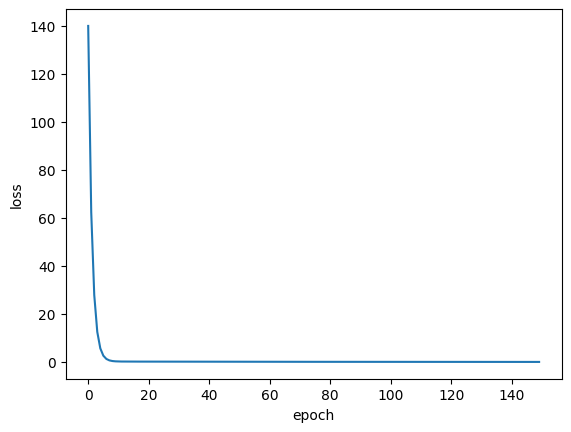

In [41]:
plt.plot(range(150), loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()